# PCA implementation
This jupyter notebook is dividing data in to X and y, creating PCA, plotting scatter plot and scree plot and doing a simple cross validation on the model where at the end a mean accuracy is printed.

## Execution
To execute the program, run cell 1, choose between cell 2 and 4 (these are the cells that import the datasets) and run cell 5.

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [7]:
with open('../Datasets/A3-dataset1Modified.csv', 'r') as file:
   dataset = pd.read_csv('../Datasets/A3-dataset1Modified.csv', sep=',')

In [5]:
with open('../Datasets/A3-dryBeansModified.csv', 'r') as file:
    dataset = pd.read_csv('../Datasets/A3-dryBeansModified.csv', sep=',')

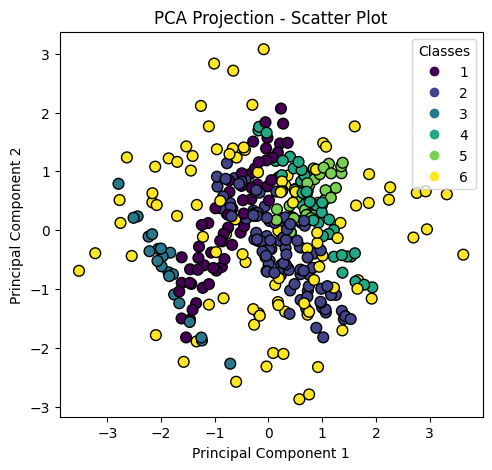

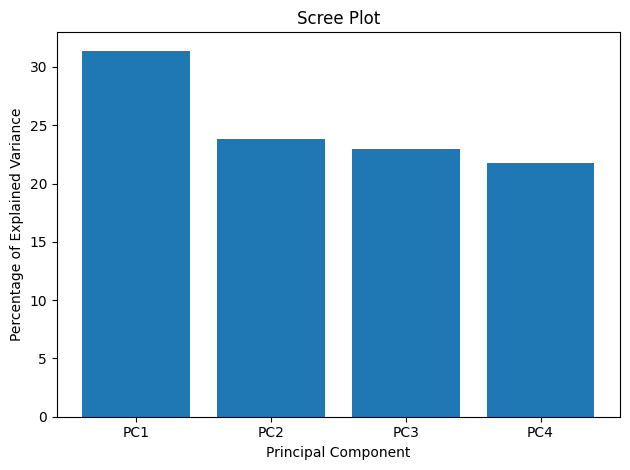

Mean Accuracy: 0.875


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

pca = PCA() # n_components = number of principal components
pca.fit(X)
pca_data = pca.transform(X)
X_pca = pca.fit_transform(X)

#colored scatter plot of the first two principal components
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.title('PCA Projection - Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title='Classes')
plt.show(block=True)

#Scree plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.tight_layout()
plt.show(block=True) 

classifier = RandomForestClassifier() 

pipeline = Pipeline(steps=[('pca', pca), ('classifier', classifier)])

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy') 

print("Mean Accuracy:", np.mean(scores))